<a href="https://colab.research.google.com/github/kny2609/Bigdata/blob/master/tf13_auto_encoder_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2020-08-25
이름 : 김나연
내용 : 딥러닝 오토인코더(AutoEncoder) MNIST 실습하기
"""

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# 데이터 전처리
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [ ]:
# Encoder 모델구성
encoder_inputs = Input(shape=(784,))
encoder_hidden = Dense(32, activation='relu')(encoder_inputs)
encoder_outputs = Dense(2)(encoder_hidden)

encoder_model = Model(encoder_inputs, encoder_outputs)
encoder_model.summary()

Model: "functional_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 25,186
Trainable params: 25,186
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Decoder 모델구성
decoder_inputs = Dense(2)(encoder_outputs)
decoder_hidden = Dense(32, activation='relu')(decoder_inputs)
decoder_outputs = Dense(784)(decoder_hidden)

#decoder_model = Model(decoder_inputs, decoder_outputs)
#decoder_model.summary()

In [ ]:
# 인코더, 디코더 모델 구성
auto_encoder = Model(encoder_inputs, decoder_outputs)
auto_encoder.summary()

Model: "functional_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_14 (Dense)             (None, 784)               25872     
Total params: 51,160
Trainable params: 51,160
Non-trainable params: 0
_________________________________________________

In [ ]:
# 모델 설정 / 학습하기
auto_encoder.compile(optimizer='adam', loss='mse')
auto_encoder.fit(x_train, x_train, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0660
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0551
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0526
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0509
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0498
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0490
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0484
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0479
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0476
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0473


In [ ]:
# 예측하기
result = auto_encoder.predict(x_test)
result

array([[ 1.91499572e-03,  5.76790422e-04, -9.18451231e-04, ...,
        -1.23667065e-04, -1.06235966e-04, -1.50680915e-03],
       [ 7.58208334e-05, -1.37113966e-03,  2.17462447e-03, ...,
         1.69667415e-04,  1.01227267e-03, -5.99033199e-04],
       [-1.86520349e-03,  4.41264361e-04,  7.08034495e-04, ...,
        -1.31909270e-04,  7.27972016e-04, -3.48807313e-03],
       ...,
       [-8.78482126e-04,  6.11390918e-04, -5.96514437e-05, ...,
        -1.40818441e-03, -9.43350606e-04, -1.21865701e-03],
       [ 1.68205053e-03, -8.07912089e-04,  2.94485828e-04, ...,
        -1.51405390e-03, -1.30496174e-03,  1.18465815e-03],
       [ 1.92752294e-03,  3.08949128e-03, -1.40161626e-03, ...,
        -1.31061953e-03, -1.00939628e-03, -8.29172321e-04]], dtype=float32)

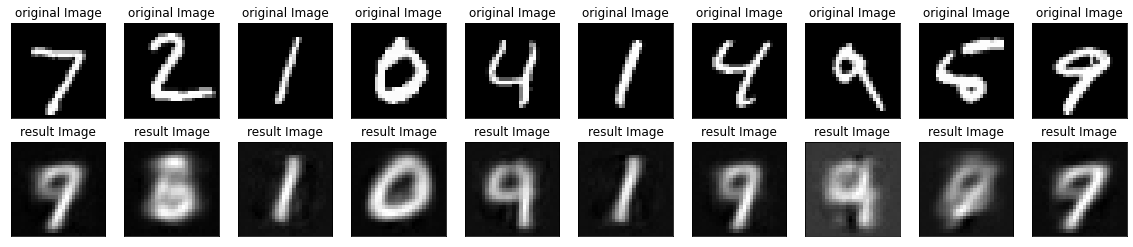

In [ ]:
# 예측값 이미지 출력
plt.figure(figsize=(20, 4))

for i in range(10):
  # original image
  ax = plt.subplot(2, 10, i+1)
  ax.set_title('original Image')
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # result image
  ax = plt.subplot(2, 10, i+11)
  ax.set_title('result Image')
  plt.imshow(result[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
# 인코더 모델로 결과 출력
encoder_pre_result = encoder_model.predict(x_test)
encoder_pre_result

array([[-1.6395336 , -3.7819774 ],
       [ 2.2320936 , -1.706342  ],
       [ 5.2983494 ,  3.2912834 ],
       ...,
       [-0.93730354, -4.052724  ],
       [ 0.06934874, -1.90224   ],
       [ 2.57634   , -4.7434382 ]], dtype=float32)

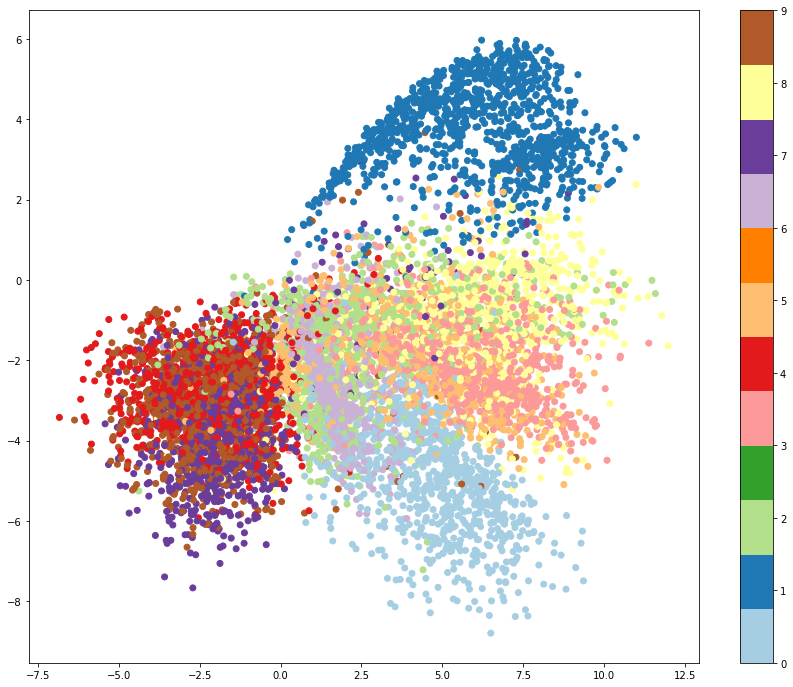

In [ ]:
# 인코더 결과값 군집확인
plt.figure(figsize=(15, 12))
plt.scatter(x=encoder_pre_result[:, 0], y=encoder_pre_result[:, 1], c=y_test, cmap=plt.get_cmap('Paired'))
plt.colorbar()
